## 1. Defining the Question

### a) Specifying the Question
As the football analyst for Mchezopesa Ltd, I have been tasked with creating a model that predicts the outcome of a football match between national teams.

### b) Defining the Metric for Success
i. Create a model that predicts whether the home team will win, lose, or draw in a football match.

ii. Create a model that predicts the number of goals that the home team will score.

iii. Create a model that predicts the number of goals that the away team will score in a given match.

### c) Understanding the context 
The term ‘odds’ is commonly used in betting and it often refers to the probability of an event occurring. In a football match, the bookmaker assigns different odds depending on the true odds of an event occurring ie.  win, loss, or draw (relative to the home team) while also factoring in the team’s form, team statistics, historical precedents, expert opinion, team motivation among other factors surrounding each match. In order to make profit, bookmakers will then adjust the probabilities downward before offering the bet to punters. While factors such as expert opinion and team motivation are hard to measure, team statistics such as wins, losses, goals scored, goals, conceded, and team ranks are recorded and can be used to predict the outcome of matches. 

FIFA has good data on the different matches, and it also as a ranking system that is used to measure the performance of national teams over time. The FIFA ranking system is updated periodically to ensure that the team rankings are reflective of team performances. The latest review of the ranking system was done in 2018 , replacing a system that was in place since 2006. More information about FIFA ranking system can be found [here](https://en.wikipedia.org/wiki/FIFA_World_Rankings). Aside from the FIFA website, bookmakers also source team information from team release news and professional contacts within different national teams. 

### d) Recording the Experimental Design
To predict the match outcome, I am tasked with creating a logistic regression model. 
To predict the match scores, I am tasked with creating a polynomial regression model.

To improve model performance, I will perform feature engineering and parameter tuning.

### e) Data Relevance
Two datasets were provided for this project. The first data set contains different football matches played by national teams across different tournaments between 1872 and 2019. This data set includes the home team, away team, match scores, country and city the match was played, along with whether or not the playing ground was neutral. The second data set contains the national team ranks of different countries in the world. The ranking data set is updated monthly depending on the performance of the different teams in their respective matches.

To predict the outcome of a match, it is important to factor in team performance which is reflected in the ranking while also considering previous results which is refelcted in the first data set.

## Importing Libraries

In [ ]:
pip install -U pandas-profiling

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling
sb.set_style()
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Checking the data sets

In [3]:
# previewing top of fifa ranking data set
fifa_ranking = pd.read_csv('/home/practitioner/Downloads/fifa_ranking.csv')
fifa_ranking.head()

rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   
2     3  Switzerland          SUI           0.0               50            9   
3     4       Sweden          SWE           0.0               55            0   
4     5    Argentina          ARG           0.0               51            5   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation   rank_date  
0                      0.0          UEFA  1993-08-08  
1                      0.0          UEFA  1993-08-08  
2                      0.0          UEFA  1993-08-08  
3                      0.0          UEFA  1993-08-08  
4                      0.0      CONMEBOL  1993-08-08

In [4]:
# preview last five rows
fifa_ranking.tail()

rank country_full country_abrv  total_points  previous_points  \
57788   206     Anguilla          AIA           0.0                0   
57789   206      Bahamas          BAH           0.0                0   
57790   206      Eritrea          ERI           0.0                0   
57791   206      Somalia          SOM           0.0                0   
57792   206        Tonga          TGA           0.0                0   

       rank_change  cur_year_avg  cur_year_avg_weighted  last_year_avg  \
57788            1           0.0                    0.0            0.0   
57789            1           0.0                    0.0            0.0   
57790            1           0.0                    0.0            0.0   
57791            1           0.0                    0.0            0.0   
57792            1           0.0                    0.0            0.0   

       last_year_avg_weighted  two_year_ago_avg  two_year_ago_weighted  \
57788                     0.0               0.0                    0.0   
57789                     0.0               0.0                    0.0   
57790                     0.0               0.0                    0.0   
57791                     0.0               0.0                    0.0   
57792                     0.0               0.0                    0.0   

       three_year_ago_avg  three_year_ago_weighted confederation   rank_date  
57788                 0.0                      0.0      CONCACAF  2018-06-07  
57789                 0.0                      0.0      CONCACAF  2018-06-07  
57790                 0.0                      0.0           CAF  2018-06-07  
57791                 0.0                      0.0           CAF  2018-06-07  
57792                 0.0                      0.0           OFC  2018-06-07

A quick overview of the data indicates that the ranks of the different countries span between August 1993 and June 2016. According to FIFA, the most recent update of the rankings was done in 2018 prior to which, the previous system was in place from 2006 to 2018. For consistency, I will only rely on data that spans 2006 to 2018 to predict the outcome of the 2018 world cup matches.

In [5]:
# previewing top of match results data set
match_results = pd.read_csv('/home/practitioner/Downloads/results.csv')
match_results.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [6]:
# preview last five rows
match_results.tail()

date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True

Assuming the results dataset is also ordered by date, the matches that have been recorded span between 1872 and 2019. To synchronize the two datsets, I will only use matches that were played between 2006 and 2018.

In [7]:
# checking the shape of our datasets
print('Fifa ranking dataset shape:', fifa_ranking.shape)
print('Results dataset shape:', match_results.shape)

Fifa ranking dataset shape: (57793, 16)
Results dataset shape: (40839, 9)


In [8]:
# checking the data types
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

The data types seem appropriate for the different columns aside from the rank date which is stored as an object. In the data preparation, this will be converted to date-time data type

In [9]:
#checking the data types
match_results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

Aside from the date column which is stored as an object rather than date-time data type, all the other data types are appropriate.

## 3. External Data Source Validation
I confirmed the validity of the FIFA world rankings using information from the official FIFA website which can be found [here](https://www.fifa.com/fifa-world-ranking/ranking-table/men/). I also confirmed the accuracy of the match scores recorded for different games through a series of validaion scores across different tournament websites on the internet.

## 4. Tidying the Dataset

### a. Match Results dataset

In [10]:
# checking for null values in the results dataset
match_results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [11]:
# split date column into year, month, and day
md = match_results['date'].str.split('-',n=2, expand=True)
match_results['year'] = md[0]
match_results['month'] = md[1]
match_results['day'] = md[2]
#match_results = match_results.drop('date', 1)
match_results[['year', 'month', 'day']] = match_results[['year', 'month', 'day']].astype(int)
match_results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
year           int64
month          int64
day            int64
dtype: object

Splitting the date column will assist in the merging of the home and away teams and their FIFA ranks for the respective years.

In [12]:
# drop columns not needed
match_results = match_results.drop(['city', 'country'], 1)
match_results.head()

date home_team away_team  home_score  away_score tournament  neutral  \
0  1872-11-30  Scotland   England           0           0   Friendly    False   
1  1873-03-08   England  Scotland           4           2   Friendly    False   
2  1874-03-07  Scotland   England           2           1   Friendly    False   
3  1875-03-06   England  Scotland           2           2   Friendly    False   
4  1876-03-04  Scotland   England           3           0   Friendly    False   

   year  month  day  
0  1872     11   30  
1  1873      3    8  
2  1874      3    7  
3  1875      3    6  
4  1876      3    4

In [13]:
# adding a score difference and win/draw/lose column relative to the home team
match_results['score_difference'] = match_results['home_score'] - match_results['away_score']
conditions = [(match_results['score_difference'] > 0), (match_results['score_difference'] == 0), (match_results['score_difference'] < 0)]
values = [2, 1, 0]  #where 2 is win, 1 is draw, 0 is loss
match_results['outcome'] = np.select(conditions, values)
match_results.head()

date home_team away_team  home_score  away_score tournament  neutral  \
0  1872-11-30  Scotland   England           0           0   Friendly    False   
1  1873-03-08   England  Scotland           4           2   Friendly    False   
2  1874-03-07  Scotland   England           2           1   Friendly    False   
3  1875-03-06   England  Scotland           2           2   Friendly    False   
4  1876-03-04  Scotland   England           3           0   Friendly    False   

   year  month  day  score_difference  outcome  
0  1872     11   30                 0        1  
1  1873      3    8                 2        2  
2  1874      3    7                 1        2  
3  1875      3    6                 0        1  
4  1876      3    4                 3        2

The score difference helps in the evaluation of each team's performance against their opponents. I recoreded wins as 2, draws as 1, and losses as 0.

In [14]:
#selecting matches that took place between January 2006 and June 2018
recent_results = match_results[match_results['date'] >= '2006-01-01']
recent_results = recent_results[recent_results['date'] <= '2018-06-07']
recent_results.shape

(11801, 12)

As was evident earlier, the match results dataset holds matches from 1872 which are useless in predicting the outcome of matches today. To get a more reflective sample of modern day football, there is need to filter the data up to a specific point in recent history. The choice of 2006 as the lower year bound is based on the fact that the most recent update of FIFA's ranking system before the 2018 world cup was done in 2006. The ranking procedures are revised with each update and this could affect the cosnsitency of ranking as a predictor for team performance acorss different eras. 2006 to 2018 seemed like a viable time duration to work with.

### b. Fifa ranking dataset

In [15]:
# checking for null values in the results dataset
fifa_ranking.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [16]:
# splitting date column to year, month, day
new = fifa_ranking['rank_date'].str.split('-',n=2, expand=True)
fifa_ranking['year_rank'] = new[0]
fifa_ranking['month_rank'] = new[1]
fifa_ranking['day_rank'] = new[2]
#fifa_ranking = fifa_ranking.drop('rank_date', 1)
fifa_ranking.tail()

rank country_full country_abrv  total_points  previous_points  \
57788   206     Anguilla          AIA           0.0                0   
57789   206      Bahamas          BAH           0.0                0   
57790   206      Eritrea          ERI           0.0                0   
57791   206      Somalia          SOM           0.0                0   
57792   206        Tonga          TGA           0.0                0   

       rank_change  cur_year_avg  cur_year_avg_weighted  last_year_avg  \
57788            1           0.0                    0.0            0.0   
57789            1           0.0                    0.0            0.0   
57790            1           0.0                    0.0            0.0   
57791            1           0.0                    0.0            0.0   
57792            1           0.0                    0.0            0.0   

       last_year_avg_weighted  two_year_ago_avg  two_year_ago_weighted  \
57788                     0.0               0.0                    0.0   
57789                     0.0               0.0                    0.0   
57790                     0.0               0.0                    0.0   
57791                     0.0               0.0                    0.0   
57792                     0.0               0.0                    0.0   

       three_year_ago_avg  three_year_ago_weighted confederation   rank_date  \
57788                 0.0                      0.0      CONCACAF  2018-06-07   
57789                 0.0                      0.0      CONCACAF  2018-06-07   
57790                 0.0                      0.0           CAF  2018-06-07   
57791                 0.0                      0.0           CAF  2018-06-07   
57792                 0.0                      0.0           OFC  2018-06-07   

      year_rank month_rank day_rank  
57788      2018         06       07  
57789      2018         06       07  
57790      2018         06       07  
57791      2018         06       07  
57792      2018         06       07

After the split, the year and month columns will be used to merge to the data set containg match results.

In [17]:
# selecting appropriate columns
select_ranking = fifa_ranking[['rank', 'rank_change', 'country_full', 'rank_date', 'year_rank', 'month_rank', 'day_rank']]
select_ranking.head()

rank  rank_change country_full   rank_date year_rank month_rank day_rank
0     1            0      Germany  1993-08-08      1993         08       08
1     2            0        Italy  1993-08-08      1993         08       08
2     3            9  Switzerland  1993-08-08      1993         08       08
3     4            0       Sweden  1993-08-08      1993         08       08
4     5            5    Argentina  1993-08-08      1993         08       08

Many of the columns in the fifa ranking data set will are not useful to our analysis so we select only select columns that we need which include the country name, rank, rank change, and the year of ranking.

In [19]:
# renaming countries with different names in the two data sets
select_ranking = select_ranking.replace("Côte d'Ivoire", 'Ivory Coast')
select_ranking.head()

rank  rank_change country_full   rank_date year_rank month_rank day_rank
0     1            0      Germany  1993-08-08      1993         08       08
1     2            0        Italy  1993-08-08      1993         08       08
2     3            9  Switzerland  1993-08-08      1993         08       08
3     4            0       Sweden  1993-08-08      1993         08       08
4     5            5    Argentina  1993-08-08      1993         08       08

Some of the countries have different names in the two data sets so we need to rename them. 

In [20]:
#selecting fifa team rankings between 2006 and 2018
recent_ranking = select_ranking[select_ranking['rank_date'] >= '2006-01-01']
recent_ranking.tail()

rank  rank_change country_full   rank_date year_rank month_rank  \
57788   206            1     Anguilla  2018-06-07      2018         06   
57789   206            1      Bahamas  2018-06-07      2018         06   
57790   206            1      Eritrea  2018-06-07      2018         06   
57791   206            1      Somalia  2018-06-07      2018         06   
57792   206            1        Tonga  2018-06-07      2018         06   

      day_rank  
57788       07  
57789       07  
57790       07  
57791       07  
57792       07

For consistency, we select team ranks that fall within the same review period.

In [21]:
#drop date columns
recent_rank = recent_ranking.drop('rank_date', 1)
recent_games = recent_results.drop('date', 1)

We drop the date columns since we already have the year, month and days.

In [22]:
# convert year, month, and day to integer for merging
convert_dict = {'year_rank': int,
                'month_rank': int, 
                'day_rank': int
               } 
  
recent_rank = recent_rank.astype(convert_dict) 
recent_rank.dtypes

rank             int64
rank_change      int64
country_full    object
year_rank        int64
month_rank       int64
day_rank         int64
dtype: object

### c. Merging the data sets

To merge the datasets, I used an inner join between the recent matches and recent ranks tables where on the matches data set I used the 'home_team', 'year', and 'month' columns to merge with the 'country_full', 'year_rank', and 'month_rank' columns. After merging, I dropped the 'year_rank', 'month_rank', 'day_rank', and 'country_full' columns since I needed the same columns to repeat the same merge to get the team ranks for the away teams.

In [23]:
# merging tables using inner join for home team rank and rank change
combo1 = pd.merge(recent_games, recent_rank, how='inner', left_on=['home_team','year', 'month'], right_on=['country_full', 'year_rank', 'month_rank'])
combo1 = combo1.drop(['year_rank', 'month_rank', 'day_rank', 'country_full'], 1)
combo1.rename(columns={'rank':'home_team_rank'}, inplace=True)
combo1.rename(columns={'rank_change':'home_rank_change'}, inplace=True)
combo1.head()

home_team     away_team  home_score  away_score              tournament  \
0     Qatar         Libya           2           0                Friendly   
1     Egypt      Zimbabwe           2           0                Friendly   
2     Egypt  South Africa           1           2                Friendly   
3     Egypt         Libya           3           0  African Cup of Nations   
4     Egypt       Morocco           0           0  African Cup of Nations   

   neutral  year  month  day  score_difference  outcome  home_team_rank  \
0    False  2006      1    2                 2        2              89   
1    False  2006      1    5                 2        2              32   
2    False  2006      1   14                -1        0              32   
3    False  2006      1   20                 3        2              32   
4    False  2006      1   24                 0        1              32   

   home_rank_change  
0                 6  
1                 0  
2                 0  
3                 0  
4                 0

In [24]:
# merging tables using inner join for away team rank and rank change
combo2 = pd.merge(combo1, recent_rank, how='inner', left_on=['away_team','year', 'month'], right_on=['country_full', 'year_rank', 'month_rank'])
combo2 = combo2.drop(['year_rank', 'month_rank', 'day_rank', 'country_full'], 1)
combo2.rename(columns={'rank':'away_team_rank'}, inplace=True)
combo2.rename(columns={'rank_change':'away_rank_change'}, inplace=True)
combo2.head()

home_team away_team  home_score  away_score              tournament  \
0     Qatar     Libya           2           0                Friendly   
1     Egypt     Libya           3           0  African Cup of Nations   
2   Tunisia     Libya           1           0                Friendly   
3     Egypt  Zimbabwe           2           0                Friendly   
4   Morocco  Zimbabwe           1           0                Friendly   

   neutral  year  month  day  score_difference  outcome  home_team_rank  \
0    False  2006      1    2                 2        2              89   
1    False  2006      1   20                 3        2              32   
2    False  2006      1   12                 1        2              28   
3    False  2006      1    5                 2        2              32   
4    False  2006      1   14                 1        2              35   

   home_rank_change  away_team_rank  away_rank_change  
0                 6              80                 0  
1                 0              80                 0  
2                 0              80                 0  
3                 0              53                 0  
4                 1              53                 0

In [25]:
# reducing cardinality of tournament column
combo2.replace(to_replace=['African Cup of Nations', 'Lunar New Year Cup',
       'AFC Asian Cup qualification', 'Cyprus International Tournament',
       'Malta International Tournament', 'AFC Challenge Cup',
       'COSAFA Cup', 'Kirin Cup',
       'Merdeka Tournament',
       'CFU Caribbean Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'AFF Championship', 'ELF Cup', 'CECAFA Cup',
       'UAFA Cup qualification', "King's Cup", 'CFU Caribbean Cup',
       'Gulf Cup', 'UNCAF Cup', 'EAFF Championship', 'Copa América',
       'Gold Cup', 'WAFF Championship', 'Island Games', 'AFC Asian Cup',
       'Nehru Cup', 'South Pacific Games',
       'Amílcar Cabral Cup', 'AFC Challenge Cup qualification',
       'Baltic Cup', 'SAFF Cup',
       'African Nations Championship', 'VFF Cup', 'Confederations Cup',
       'Dragon Cup', 'ABCS Tournament', 'Nile Basin Tournament',
       'Nations Cup', 'Copa Paz del Chaco', 'Pacific Games',
       'Oceania Nations Cup qualification', 'Oceania Nations Cup',
       'UAFA Cup', 'OSN Cup', 'Windward Islands Tournament',
       'Gold Cup qualification', 'Copa América qualification',
       'Intercontinental Cup', 'UEFA Euro qualification', 'UEFA Euro'], value = 'Other competition', inplace=True)
combo2.tournament.unique()

array(['Friendly', 'Other competition', 'FIFA World Cup',
       'FIFA World Cup qualification'], dtype=object)

In [26]:
#cheking for duplicates
combo2.duplicated().sum()

48

In [27]:
# dropping duplictes  
combo2 = combo2.drop_duplicates()
#cheking for duplicates
combo2.duplicated().sum()

0

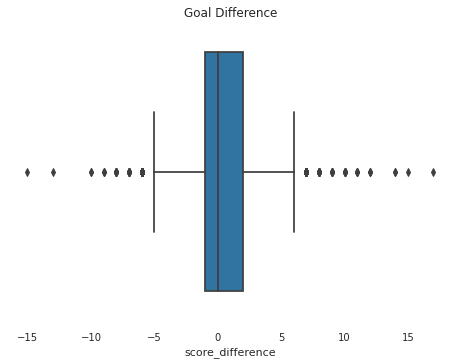

In [28]:
#checking for outliers
sb.boxplot(x=combo2['score_difference'])
plt.title('Goal Difference')
plt.show()

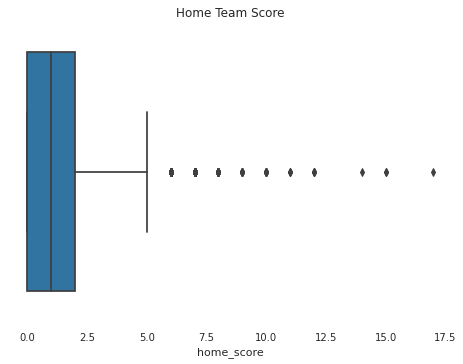

In [29]:
#checking for outliers
sb.boxplot(x=combo2['home_score'])
plt.title('Home Team Score')
plt.show()

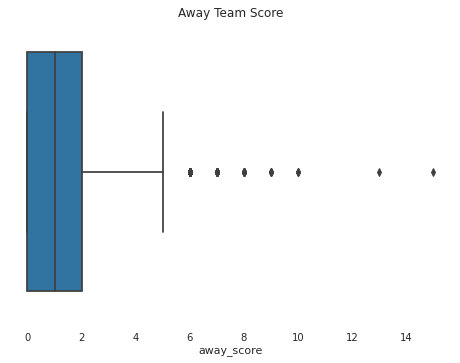

In [30]:
#checking for outliers
sb.boxplot(x=combo2['away_score'])
plt.title('Away Team Score')
plt.show()

In [31]:
#checking table statistics
combo2.describe()

home_score   away_score         year        month          day  \
count  9437.000000  9437.000000  9437.000000  9437.000000  9437.000000   
mean      1.539472     1.055632  2011.721734     6.956978    14.341846   
std       1.516916     1.228537     3.500398     3.297470     8.615898   
min       0.000000     0.000000  2006.000000     1.000000     1.000000   
25%       0.000000     0.000000  2009.000000     4.000000     7.000000   
50%       1.000000     1.000000  2012.000000     7.000000    13.000000   
75%       2.000000     2.000000  2015.000000    10.000000    22.000000   
max      17.000000    15.000000  2018.000000    12.000000    31.000000   

       score_difference      outcome  home_team_rank  home_rank_change  \
count       9437.000000  9437.000000     9437.000000       9437.000000   
mean           0.483840     1.193494       80.305818          0.690580   
std            2.104135     0.849075       52.664288          7.788676   
min          -15.000000     0.000000        1.000000        -62.000000   
25%           -1.000000     0.000000       35.000000         -2.000000   
50%            0.000000     1.000000       76.000000          0.000000   
75%            2.000000     2.000000      119.000000          3.000000   
max           17.000000     2.000000      209.000000         73.000000   

       away_team_rank  away_rank_change  
count     9437.000000       9437.000000  
mean        82.900922          0.071527  
std         53.258717          7.891007  
min          1.000000        -62.000000  
25%         38.000000         -3.000000  
50%         78.000000          0.000000  
75%        121.000000          2.000000  
max        209.000000         82.000000

From the above box plots and table description, we can clearly observe outliers in the 'home_score', 'away_score', and 'score_difference' columns. In the 'home_score', the highest number goals scored is 21 yet the 75th percentile is 2 goals scored. This difference is also evident in the 'away_score' and 'score_difference' columns. Since we intend to make predictions using the data, we need to remove the outliers. 

In [33]:
# compute iqr score to remove outliers for age and household size
q1_diff, q3_diff = np.percentile(combo2['score_difference'], [25, 75])
iqr_diff = q3_diff - q1_diff

lower_diff = q1_diff - (1.5 * iqr_diff)
upper_diff = q3_diff + (1.5 * iqr_diff)
upper_diff, lower_diff

(6.5, -5.5)

In [34]:
#removing outliers
print(combo2.shape, ': With outliers')

combo2 = combo2.drop(combo2[combo2['score_difference'] > 5].index)
combo2 = combo2.drop(combo2[combo2['score_difference'] < -5].index)
combo2 = combo2.drop(combo2[combo2['home_score'] > 5.5].index)
combo2 = combo2.drop(combo2[combo2['away_score'] > 5.5].index)

print(combo2.shape, ': No outliers')

(9437, 15) : With outliers
(9158, 15) : No outliers


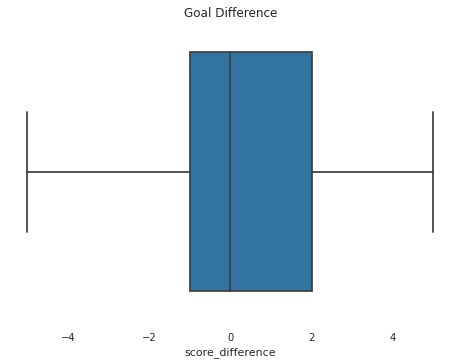

In [35]:
#checking for outliers
sb.boxplot(x=combo2['score_difference'])
plt.title('Goal Difference')
plt.show()

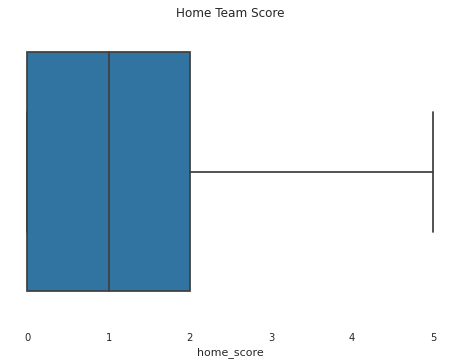

In [36]:
#checking for outliers
sb.boxplot(x=combo2['home_score'])
plt.title('Home Team Score')
plt.show()

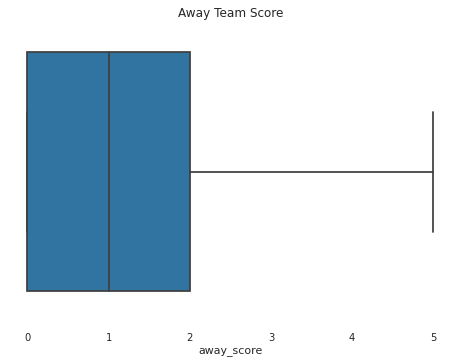

In [37]:
#checking for outliers
sb.boxplot(x=combo2['away_score'])
plt.title('Away Team Score')
plt.show()

All outliers were effectively removed.

In [38]:
# checking the count for tournament types
combo2.tournament.value_counts()

Friendly                        3682
Other competition               3425
FIFA World Cup qualification    1984
FIFA World Cup                    67
Name: tournament, dtype: int64

Before the dependent variables can be used to make predictions, we need to get dummy variables for the categorical columns. Due to the high cardinality of the team names, we will only encode the tournament type.

In [39]:
# encode categorical columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
rresults_dummies = pd.get_dummies(combo2.drop(['away_team', 'home_team'], 1), prefix_sep='_', drop_first=True)
rresults_dummies[['away_team', 'home_team']] = combo2[['away_team', 'home_team']]
rresults_dummies.head()

home_score  away_score  neutral  year  month  day  score_difference  \
0           2           0    False  2006      1    2                 2   
1           3           0    False  2006      1   20                 3   
2           1           0    False  2006      1   12                 1   
3           2           0    False  2006      1    5                 2   
4           1           0    False  2006      1   14                 1   

   outcome  home_team_rank  home_rank_change  away_team_rank  \
0        2              89                 6              80   
1        2              32                 0              80   
2        2              28                 0              80   
3        2              32                 0              53   
4        2              35                 1              53   

   away_rank_change  tournament_FIFA World Cup qualification  \
0                 0                                        0   
1                 0                                        0   
2                 0                                        0   
3                 0                                        0   
4                 0                                        0   

   tournament_Friendly  tournament_Other competition away_team home_team  
0                    1                             0     Libya     Qatar  
1                    0                             1     Libya     Egypt  
2                    1                             0     Libya   Tunisia  
3                    1                             0  Zimbabwe     Egypt  
4                    1                             0  Zimbabwe   Morocco

In [40]:
# previewing last five rows of table with dummies
rresults_dummies.tail()

home_score  away_score  neutral  year  month  day  score_difference  \
9480           1           1    False  2018      6    5                 0   
9481           1           0    False  2018      6    6                 1   
9482           1           1    False  2018      6    6                 0   
9483           3           0    False  2018      6    7                 3   
9484           3           0    False  2018      6    7                 3   

      outcome  home_team_rank  home_rank_change  away_team_rank  \
9480        1             126                 7             129   
9481        2              53                -5              55   
9482        1              78                 1              51   
9483        2              14                 3              95   
9484        2               4                 0              66   

      away_rank_change  tournament_FIFA World Cup qualification  \
9480                10                                        0   
9481                 0                                        0   
9482                -2                                        0   
9483                -7                                        0   
9484                -2                                        0   

      tournament_Friendly  tournament_Other competition   away_team  home_team  
9480                    1                             0      Latvia  Lithuania  
9481                    1                             0      Panama     Norway  
9482                    1                             0     Hungary    Belarus  
9483                    1                             0  Uzbekistan    Uruguay  
9484                    1                             0     Algeria   Portugal

## 5. Exporatory Data Analysis

In [41]:
# creating a profile report for the combined data set
from pandas_profiling import ProfileReport
profile = ProfileReport(combo2, title='FIFA Matches and World Rankings Report')

In [42]:
profile.to_notebook_iframe()

In [43]:
# save profile repot as html file
profile.to_file("FIFA Matches and World Rankings Report.html")

## 6. Modelling

### a. Logistic Regression model

In [45]:
# Logistic regression
training1 = rresults_dummies[rresults_dummies['year']<2016]
training1 = training1.drop(['day'],1)
training1.tail()

home_score  away_score  neutral  year  month  score_difference  outcome  \
7720           2           0    False  2015     12                 2        2   
7721           4           0     True  2015     12                 4        2   
7722           0           3     True  2015     12                -3        0   
7723           3           1     True  2015     12                 2        2   
7724           0           3     True  2015     12                -3        0   

      home_team_rank  home_rank_change  away_team_rank  away_rank_change  \
7720             166                 6             194                 0   
7721             150                 6             182                -2   
7722             188                -8             182                -2   
7723             160                 6             188                -8   
7724             188                -8             150                 6   

      tournament_FIFA World Cup qualification  tournament_Friendly  \
7720                                        0                    0   
7721                                        0                    0   
7722                                        0                    0   
7723                                        0                    0   
7724                                        0                    0   

      tournament_Other competition    away_team    home_team  
7720                             1    Sri Lanka        India  
7721                             1   Bangladesh  Afghanistan  
7722                             1   Bangladesh       Bhutan  
7723                             1       Bhutan     Maldives  
7724                             1  Afghanistan       Bhutan

In [46]:
# assign features and target
X = training1[['home_rank_change', 'away_rank_change', 'home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y = training1['outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

I used a test size of 10% in the split since I have a different set of matches that I will use for evaluation of model performance after training. 

In [47]:
#tranform the data using standard scaler
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [48]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=1)
LogReg.fit(X_train, y_train)

# Using the model to make predictions
y_pred = LogReg.predict(X_test)

In [49]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[125   0  69]
 [ 58   0 111]
 [ 50   0 333]]
Accuracy 0.613941018766756


With a test size of 0.1 from matches played between 2006 and 2016, my model predicted 61.4 % of the matches played correctly.

#### Logistic Model Evaluation using validation data set

In [50]:
# selecting matches played in 2016 and beyond
validation = rresults_dummies[rresults_dummies['year']>=2016]
validation = validation.drop(['month', 'day'],1)
validation.head()

home_score  away_score  neutral  year  score_difference  outcome  \
7725           2           1    False  2016                 1        2   
7726           1           1    False  2016                 0        1   
7727           0           0    False  2016                 0        1   
7728           0           1     True  2016                -1        0   
7729           1           0    False  2016                 1        2   

      home_team_rank  home_rank_change  away_team_rank  away_rank_change  \
7725             163                 3             153                -3   
7726              91                10              57                 2   
7727              62                 1              57                 2   
7728             105                 0              57                 2   
7729              91                10              19                 0   

      tournament_FIFA World Cup qualification  tournament_Friendly  \
7725                                        0                    0   
7726                                        0                    1   
7727                                        0                    1   
7728                                        0                    0   
7729                                        0                    0   

      tournament_Other competition    away_team home_team  
7725                             1  Afghanistan     India  
7726                             0     Cameroon    Rwanda  
7727                             0     Cameroon    Uganda  
7728                             1     Cameroon    Angola  
7729                             1  Ivory Coast    Rwanda

In [51]:
# assigning features and targets
X_wc = validation[['home_rank_change', 'away_rank_change', 'home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y_wc = validation['outcome']

# transforming the data
X_wc = feature_scaler.transform(X_wc)
wc_pred = LogReg.predict(X_wc)

# checking model accuracy
cm = confusion_matrix(y_wc, wc_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_wc, wc_pred)))

[[271   0 196]
 [130   1 328]
 [ 93   0 684]]
Accuracy0.5613623018203171


This validation tests the model on 'future' matches (2016-2018), and it accurately predicts 56.1% of the matches correctly which is slightly lower than 61.4% accuracy recorded in training.

### b. Performing PCA

In [52]:
#Assigning the features amd targets
X = training1[['home_rank_change', 'away_rank_change', 'home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y = training1['outcome']

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

I used a test size of 10% in the split since I have a different set of matches that I will use for evaluation of model performance after training. 

In [53]:
# scale the features using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# import PCA
from sklearn.decomposition import PCA
# train using 6 principal components
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [55]:
# import Random Forest Classifier for predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=4, random_state=9)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [56]:
# check model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[104   0  90]
 [ 49   0 120]
 [ 38   0 345]]
Accuracy 0.6018766756032171


Using PCA for feature reduction, and a test size of 0.1 from matches played between 2006 and 2016, my model predicted 60.2 % of the matches played correctly. This score was attained using 6 principal components.

#### Model Evaluation

In [57]:
# Assigning features and targets
X_wc = validation[['home_score', 'away_score', 'home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y_wc = validation['outcome']

#Transforming the features
X_wc = sc.transform(X_wc)
X_wc = pca.transform(X_wc)

#making predictions
wc_pred = classifier.predict(X_wc)

In [58]:
# Checking model accuracy
cm = confusion_matrix(y_wc, wc_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_wc, wc_pred)))

[[288   0 179]
 [133   0 326]
 [ 42   0 735]]
Accuracy0.6007046388725779


For matches played between 2016 and 2018, my model correctly predicted 60% of the outcomes which is almost equal to the training score. However,with PCA, the model performs better on validation than the logistic regression model which had an accuracy of 56.1%.

### c. Performing LDA

In [59]:
#Assigning the features amd targets
X = training1[['home_rank_change', 'away_rank_change', 'home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y = training1['outcome']

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [60]:
# scale the features using standard scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
# import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# train using 2 linear discriminants
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [62]:
# import Random Forest Classifier for predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, random_state=300)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [63]:
# check model accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[130   0  64]
 [ 61   0 108]
 [ 46   0 337]]
Accuracy0.6260053619302949


Using 2 linear discriminants, my model predicted 62.6% of matches correctly which is the highest accuracy of all models in the training phase.

#### Model Evaluation

In [65]:
# assigning features and targets
X_wc = validation[['home_rank_change', 'away_rank_change', 'home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y_wc = validation['outcome']

X_wc = sc.transform(X_wc)
X_wc = lda.transform(X_wc)
wc_pred = classifier.predict(X_wc)

In [66]:
# checking model accuracy
cm = confusion_matrix(y_wc, wc_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_wc, wc_pred)))

[[273   0 194]
 [135   0 324]
 [ 90   0 687]]
Accuracy0.5637110980622431


Although the model performed relatively highly in the training phase, its accuracy drops to 56.3% which is almost equal to the perfomaance of the logistic regression model on the validation data set.

### d. Polynomial regression model (Home Team Score)

In [69]:
# assining features and target
X = training1[['home_team_rank', 'away_team_rank', 'home_rank_change', 'away_rank_change','tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y = training1['home_score']

In [70]:
# Fit linear Regression to the data set for comaprison with polynomial regression
from sklearn.linear_model import LinearRegression

reg_line = LinearRegression()
reg_line.fit(X,y)

# check score
reg_line.score(X,y)

0.183756378945109

In [71]:
# Fit polynomial model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.1, random_state=10)

pol_reg = LinearRegression()
model = pol_reg.fit(X_poly_train, y_train)
score = model.score(X_poly_test, y_test)

#check score
score

0.16485339296207635

### e. Polynomial regression model (Away Team Score)

In [73]:
X = training1[['home_team_rank', 'away_team_rank', 'tournament_Friendly', 'tournament_FIFA World Cup qualification', 'tournament_Other competition']]
y = training1['away_score']

In [75]:
# Fit polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression

reg_line = LinearRegression()
reg_line.fit(X,y)

reg_line.score(X,y)

0.1398407211283721

In [77]:
# Fit polynomial model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.15, random_state=300)

pol_reg = LinearRegression()
model = pol_reg.fit(X_poly_train, y_train)
score = model.score(X_poly_test, y_test)
score

0.11769616259646476

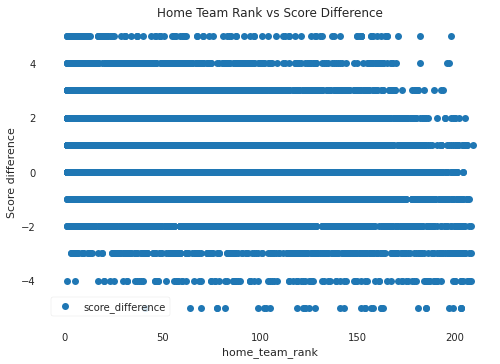

In [78]:
combo2.plot(x='home_team_rank', y='score_difference', style='o')
plt.ylabel('Score difference')
plt.title('Home Team Rank vs Score Difference')
plt.show()

## Summary and Recommendations

In this project, I was tasked with creating three models that predict the outcome of a football match between national teams. All models were trained on the team ranks and tournament type and they gave different predictions. The logistic regression model predicted the match outcome as win, draw, or loss relative to the home team. The polynomial regression models predicted the match scores for the home and away teams. The logistic regression model had a 56% accuracy. After performing feature engineering, I performed linear discriminant analysis and used a random forest classifier to make predictions which had no effect on the models performance on the validation data set with a 56% accuracy level. With feature engineering, principal component analysis produced the highest accuracy scores with 60% on the validation data set.

As evidenced by the accuracy scores and the profile report, linear regression and polynomial regression models do not suit the data. To predict the the scores of different teams, I would recommend a Poisson model which predict the goals scored by each team. This model will consider the average number of goals scored by each time over the period identified and predict the likelihood of future scores deviating from the average based on changes in the team's performance based on their ranks.


## Challenging the result
A major challenge I experienced was regarding the high cardinality of the categorical columns. While training the models, encoding columns such as tournament type beyond the world cup, world cup qualifications, and friendlies categories since there are multiple tournaments and team names. This was a major challenge since my computer's memory was unable to successfully perform the computation.

To improve the scores, I tuned the model parameters manually which helped to improve the scores. However, I could attain better scores with hyperparameter tuning.

To improve the scores, there is need to gather more information about the different national teams including player details, player form, coaching staff, team tactics among others which will give a clearer indication of team performance rather than simply relying on team ranks.

I will also look to create a poisson regression model to predict the match scores as it is better suited for the task.